# FINAL PROJECT - Identify Consumer Profiles of E-Commerce

<a id='back'></a>
## Index
* [1. Research objectives](#num1)
    * [1.1 Objective](#num11)
    * [1.2 Stakeholders](#num12)
* [2. Questions to be answered](#num2)
    * [2.1 Questions](#num21)
* [3. Download the data](#num3)
    * [3.1 Description of the Data](#num31)
* [4. Presentation / Dashboard](#num4)
* [5. Data Preparation](#num5)
* [6. Exploratory data analysis (EDA)](#num6)
    * [6.1 Average Daily, Weekly, and Monthly Metrics](#num61)
        * [6.1.1 Number of Customers](#num611)
        * [6.1.2 Number of Transactions](#num612)
        * [6.1.3 Number of Product Sold](#num613)
        * [6.1.4 Sales quantity (Sum of Items)](#num614)
        * [6.1.5 Revenue](#num615)
    * [6.2 Metrics Trends](#num62)
        * [6.2.1 Daily Trends](#num621)
        * [6.2.2 Monthly Meteric](#num622)
* [7. User Segmentation: RFM Analysis and K-Means Clustering](#num7)
    * [7.1 Customer RFM Data](#num71)
    * [7.2 K-Means Clustering](#num72)
        * [7.2.1 Evaluation Metrics For Clustering-Based Models](#num721)
    * [7.3 User Segmentation Result and Evaluation](#num73)
* [8. Answering the questions](#num8)
    * [8.1 Question 1](#num81)
    * [8.2 Question 2 and 3](#num82)
    * [8.4 Question 4](#num83)
    * [8.5 Question 5](#num84)
* [9. Formulate and test statistical hypotheses](#num9)
    * [9.1 Hypothesis 1](#num91)
    * [9.2 Hypothesis 2](#num92)
    * [8.3 Hypothesis 3](#num93)
    * [9.4 Hypothesis 4](#num94)
    * [9.5 Hypothesis 5](#num95)
* [10. Final Conclusions](#num10)
* [11. Links](#num_11)

<a id="num1"></a>
## Research objectives

Welcome to our project on personalized offers for users of Everything Plus, an online store that sells household goods. Our customer is the product manager responsible for user experience, who has requested our analysis to help make personalized offers for users. The intended users of our final result are the customers who asked for the analysis.

Our goal is to analyze the entire period covered by the source data, which contains the transaction history of Everything Plus. The dataset, named ecommerce_dataset_us.csv, contains several columns, including order and item identifiers, item names, order date, price per item, and customer ID.

The need for this research arose because qualitative research alone is not sufficient to make informed decisions. Therefore, we will analyze the data to provide arguments based on facts and figures. This kind of research has not been carried out by Everything Plus before, making our project a unique and exciting opportunity.

Our solution will involve analyzing the data to identify patterns and trends that can help personalize offers for users. We will provide detailed insights and recommendations based on the data to help the product manager and customers make informed decisions.

[Return to Index](#back)

<a id="num11"></a>
### Objective
- Clean and prepare data
- Carry out exploratory data analysis and visualize metrics
- Segment users based on their consumer profiles.
- Evaluate user segmentation and answer questions
- Formulate and test statistical hypotheses
- Come up with conclusions and basic recommendations

[Return to Index](#back)

<a id="num12"></a>
### Stakeholders
1. Product Manager responsible for user experience
2. Project Manager
3. Senior Data Analyst

[Return to Index](#back)

<a id="num2"></a>
## Questions to be answered

[Return to Index](#back)

<a id="num21"></a>
### Questions
1. Are there customer segments that only make purchases during certain seasons or times of the year?
2. Are there customer segments that have been repeat purchasers for a long period of time?
3. Are there customer segments that have made repeat purchases in a short time frame?
4. Are there customer segments that place large orders, and what patterns can be observed in their purchasing behavior?
5. Are there customer segments that primarily make wholesale orders?
6. Are there customer segments that were previously high spenders or frequent purchasers but have since stopped making purchases and have been inactive for a long period of time?

[Return to Index](#back)

<a id="num3"></a>
## Download the data
The dataset contains the transaction history of Everything Plus, an online store that sells household goods.

The file `ecommerce_datasets_us.csv` contains the following columns:

[Return to Index](#back)

<a id="num31"></a>
### Description of the Data

| Column names | Description |
|-|-------------|
| InvoiceNo | order identifier |
| StockCode | item identifier |
| Description | item name |
| Quantity |  |
| InvoiceDate | order date |
| UnitPrice | price per item |
| CustomerID |  |

[Return to Index](#back)

<a id="num4"></a>
## Presentation / Dashboard

[Presentation PDF](https://drive.google.com/drive/folders/1gslZ4Osf7-vBGqRZu8KzUt81o1CX0N_z?usp=sharing)

[Dashboard](https://public.tableau.com/app/profile/katia.goldchleger/viz/Dashboard_Final_Project_17100040077720/Storytelling?publish=yes)

[Return to Index](#back)

<a id="num5"></a>
## Data Preparation
- Import the necessary libraries

[Return to Index](#back)

In [163]:
import pandas as pd
import numpy as np
import datetime as dt
from scipy import stats as st

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

- Load the dataset using `pd.read_csv()`, specifying the appropriate parameters for parsing dates, and rename the columns as needed.
- Use `df_ecommerce.info()` to inspect the general information about the dataset, such as the number of columns and rows, column data types, and missing values.

In [164]:
# TRIPLETEN

# df_ecommerce = pd.read_csv('/datasets/ecommerce_dataset_us.csv', sep='\t', parse_dates = ['InvoiceDate'])

# df_ecommerce = df_ecommerce.rename(columns={'InvoiceNo' : 'order_id',
#                             'StockCode' : 'item_id',
#                             'Description' : 'item_name',
#                             'Quantity' : 'quantity',
#                             'InvoiceDate' : 'timestamp',
#                             'UnitPrice' :'item_price',
#                             'CustomerID' : 'customer_id'})

In [165]:
df_ecommerce = pd.read_csv('ecommerce_dataset_us.csv', sep='\t', parse_dates = ['InvoiceDate'])

df_ecommerce = df_ecommerce.rename(columns={'InvoiceNo' : 'order_id',
                            'StockCode' : 'item_id',
                            'Description' : 'item_name',
                            'Quantity' : 'quantity',
                            'InvoiceDate' : 'timestamp',
                            'UnitPrice' :'item_price',
                            'CustomerID' : 'customer_id'})

In [166]:
# general information
df_ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   order_id     541909 non-null  object        
 1   item_id      541909 non-null  object        
 2   item_name    540455 non-null  object        
 3   quantity     541909 non-null  int64         
 4   timestamp    541909 non-null  datetime64[ns]
 5   item_price   541909 non-null  float64       
 6   customer_id  406829 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 28.9+ MB


**Notes and Findings:**
1. The names of the columns have been modified to align with the standard naming conventions.
2. Additionally, the timestamp column's data type has been converted from object to datetime64[ns].
3. There is missing values on item_name and customer_id

- Use `df_ecommerce.describe()` to get a summary of the statistical properties of the dataset, such as the mean, standard deviation, minimum and maximum values, and quartiles of each numerical column. This method can provide valuable insights into the distribution of the data and help identify potential outliers or data inconsistencies.

In [167]:
# metric information
df_ecommerce.describe()

,quantity,timestamp,item_price,customer_id
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2019-07-02 13:34:57.156386560,4.611114,15287.690570
min,-80995.000000,2018-11-29 08:26:00,-11062.060000,12346.000000
25%,1.000000,2019-03-26 11:34:00,1.250000,13953.000000
50%,3.000000,2019-07-17 17:17:00,2.080000,15152.000000
75%,10.000000,2019-10-17 11:27:00,4.130000,16791.000000
max,80995.000000,2019-12-07 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [168]:
df_ecommerce.describe(include='object')

,order_id,item_id,item_name
count,541909,541909,540455
unique,25900,4070,4223
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER
freq,1114,2313,2369


**Notes and Findings:**
1. Anomalous values were detected in the numerical columns, including:
    - Extremely large but similar values at both ends of the quantity range
    - Negative values in both quantity and item_price columns
2. When examining the statistical measures of quantity and item_price, the data distribution is found to be skewed to the right.
3. The timestamp of the transactions ranges from November 29, 2018, to December 12, 2019.
4. The number of unique item_names is greater than the number of unique item_ids, which suggests that some items have multiple names.
5. The dataset includes 541,909 purchases recorded across 25,900 transactions.
6. The most popular item is the White Hanging Heart T-Light Holder.

- Use `df_ecommerce.head()` to examine the first few rows of the dataset to ensure that the data was loaded correctly.

In [169]:
df_ecommerce.head()

,order_id,item_id,item_name,quantity,timestamp,item_price,customer_id
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55,17850.0
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29 08:26:00,3.39,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-11-29 08:26:00,2.75,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29 08:26:00,3.39,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-11-29 08:26:00,3.39,17850.0


- Remove duplicate records using `df_ecommerce.duplicated().sum()` and `df_ecommerce.drop_duplicates()`, respectively.

In [170]:
# checking for duplicated data
df_ecommerce.duplicated().sum()

5268

In [171]:
# removing the duplicated data
df_ecommerce.drop_duplicates(inplace=True)

**Notes and Findings:**
1. We have removed 5,268 duplicate rows (0.972% of data).

- Inspect missing values with `df_ecommerce.isna().sum()` to determine which columns require further cleaning.

In [172]:
# checking for missing data
df_ecommerce.isna().sum()

order_id            0
item_id             0
item_name        1454
quantity            0
timestamp           0
item_price          0
customer_id    135037
dtype: int64

**Notes and Findings:**
1. There are 1454 instances where the `item_name` is missing, which accounts for 0.271% of the current data.
2. Similarly, there are 135,037 instances where the `customer_id` is missing, which makes up 25.16% of the current data.
3. Although the number of missing values for `item_name` is insignificant, we have decided to address this issue rather than deleting those rows. It only takes a few minutes to write the code to fix this column, and it can be useful for future projects.
4. On the other hand, missing values for `customer_id` are significant, and therefore, we need to investigate this matter further.

**For item_name:**
- Group data by `item_id` and count the number of occurrences
- Filter out NaN values and get the most common item name for each `item_id`
- Combine the item counts and most common item names into a new dataframe
- Fill the missing value of item_name according to each `item_id`

In [173]:
# Group data by item_id and count the number of occurrences
item_counts = df_ecommerce.groupby('item_id')['item_name'].count()

# Filter out NaN values and get the most common item name for each item_id
most_common = df_ecommerce[df_ecommerce['item_name'].notna()].groupby('item_id')['item_name'].agg(lambda x: x.value_counts().index[0])

# Combine the item counts and most common item names into a new dataframe
items = pd.concat([item_counts, most_common], axis=1)

# Rename the columns in the new dataframe
items.columns = ['count', 'most_common']

# Reset the index to make the 'item_id' column a regular column
items = items.reset_index()

# add most_common column from items to data
merged_data = df_ecommerce.merge(items,on='item_id', how='left')

# drop item_name from data and count from items and rename most_common into item_name
merged_data = merged_data.drop(['item_name'], axis=1)
merged_data = merged_data.rename(columns={'most_common': 'item_name'})
merged_data = merged_data.drop(['count'], axis=1)

df_ecommerce = merged_data.copy()

- Check if there are still null values

In [174]:
# checking for missing data again
df_ecommerce.isna().sum()

order_id            0
item_id             0
quantity            0
timestamp           0
item_price          0
customer_id    135037
item_name         112
dtype: int64

- Use `describe()` method to check the significancy of remaining missing values,
- `dropna()` if the null values are insignificant.

In [175]:
df_ecommerce[df_ecommerce['item_name'].isna()].describe()

,quantity,timestamp,item_price,customer_id
count,112.000000,112,112.0,0.0
mean,-8.196429,2019-03-17 12:59:55.178571520,0.0,NaN
min,-102.000000,2018-11-29 14:32:00,0.0,NaN
25%,-11.000000,2019-01-26 14:48:15,0.0,NaN
50%,-4.000000,2019-03-30 16:40:30,0.0,NaN
75%,-1.000000,2019-04-26 15:06:15,0.0,NaN
max,57.000000,2019-11-22 10:36:00,0.0,NaN
std,16.003288,NaN,0.0,NaN


In [176]:
# Drop rows that have missing values in the 'item_name' column
df_ecommerce = df_ecommerce.dropna(subset=['item_name'])

**Notes and Findings:**
- Once we resolved the naming problem, we discovered that 112 rows still did not have an item name. Upon further investigation, it was determined that these items also had no price. As they are negligible in relation to the entire dataset, we have decided to remove these rows.

**For column of customer_id:**
- Create new customer ID for each order_id since we have not enough data to make assumptions about the customers.

In [177]:
def fill_customer_id(row):
    # check if customer_id is NaN
    if pd.isna(row['customer_id']):
        # Extract the first four digits of the order_id
        id_suffix = str(row['order_id'])[2:]
        
        # Create a new customer_id using the extracted prefix and the marker '2'
        new_customer_id = float('2' + id_suffix)
        
        return new_customer_id
    else:
        # If customer_id is not NaN, return it
        return row['customer_id']
    
# Apply the function to each row of the dataframe
df_ecommerce['customer_id'] = df_ecommerce.apply(fill_customer_id, axis=1)

In [178]:
# checking for missing data once again
df_ecommerce.isna().sum()

order_id       0
item_id        0
quantity       0
timestamp      0
item_price     0
customer_id    0
item_name      0
dtype: int64

**Notes and Findings:**
1. We no longer have missing values in our datasets

- Remove outliers for numeric columns such as `item_price`
- Check `item_price` distribution with `sns.boxplot()`

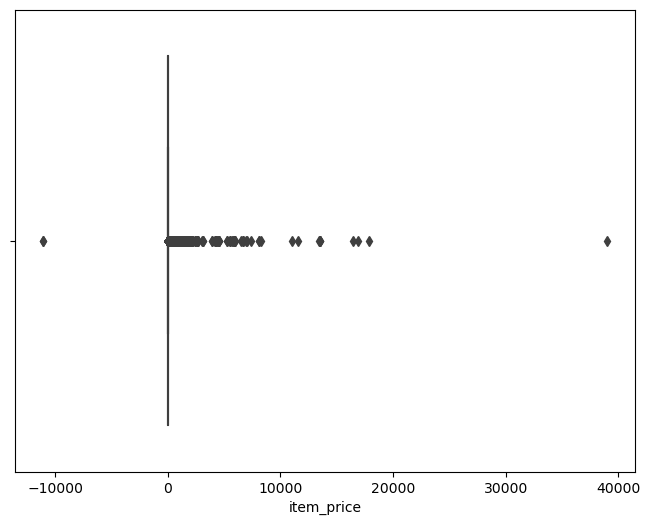

In [179]:
plt.figure(figsize=(8,6))

sns.boxplot(data=df_ecommerce, x='item_price');

- Check data with huge `item_price` values

In [180]:
df_ecommerce[df_ecommerce['item_price'] > 1000]

,order_id,item_id,quantity,timestamp,item_price,customer_id,item_name
14756,C537630,AMAZONFEE,-1,2018-12-05 15:04:00,13541.33,237630.0,AMAZON FEE
14757,537632,AMAZONFEE,1,2018-12-05 15:08:00,13541.33,27632.0,AMAZON FEE
15972,C537644,AMAZONFEE,-1,2018-12-05 15:34:00,13474.79,237644.0,AMAZON FEE
16044,C537647,AMAZONFEE,-1,2018-12-05 15:41:00,5519.25,237647.0,AMAZON FEE
16087,C537651,AMAZONFEE,-1,2018-12-05 15:49:00,13541.33,237651.0,AMAZON FEE
...,...,...,...,...,...,...,...
523646,580729,DOT,1,2019-12-03 17:24:00,1172.10,20729.0,DOTCOM POSTAGE
528295,581023,DOT,1,2019-12-05 10:35:00,1861.46,21023.0,DOTCOM POSTAGE
531606,581219,DOT,1,2019-12-06 09:28:00,1008.96,21219.0,DOTCOM POSTAGE
532022,581238,DOT,1,2019-12-06 10:53:00,1683.75,21238.0,DOTCOM POSTAGE


**Notes and Findings:**
1. Upon investigation, we found that the unusual `item_price` values were originated from items with the similar type of non-numerical `item_id`.

- Check `item_id` that contains only letter and no numbers

In [181]:
df_ecommerce[~df_ecommerce['item_id'].str.contains('\d')]['item_id'].value_counts()

item_id
POST            1256
DOT              710
M                566
D                 77
S                 62
BANK CHARGES      37
AMAZONFEE         34
CRUK              16
DCGSSGIRL         13
DCGSSBOY          11
PADS               4
B                  3
m                  1
Name: count, dtype: int64

**Notes and Findings:**
1. `item_id` consisting solely of letters are associated with administrative processes and do not align with our objective of user segmentation. Therefore, we will not be investigating this type of data.

- Remove rows with `item_id` consisting solely of letters.
- Check processed `item_price` distribution with `sns.boxplot()`

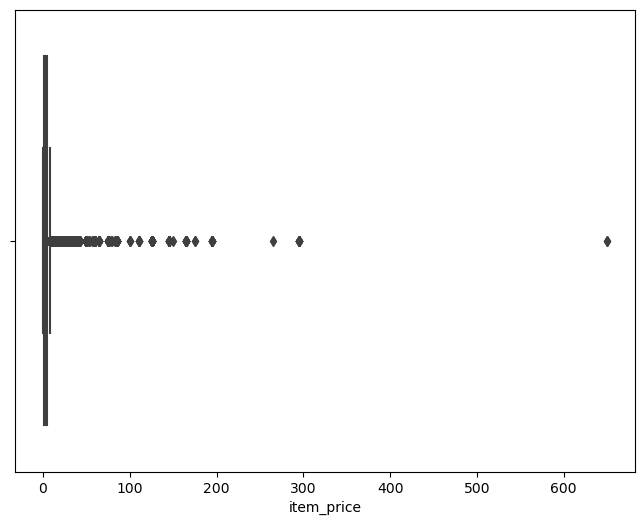

In [182]:
non_numeric_item_ids = df_ecommerce[~df_ecommerce['item_id'].str.contains('\d')]['item_id'].unique()
df_ecommerce = df_ecommerce[~df_ecommerce['item_id'].isin(non_numeric_item_ids)]

plt.figure(figsize=(8,6))
sns.boxplot(data=df_ecommerce, x='item_price');

**Notes and Findings:**
1. The distribution of item prices has improved, as there are no longer negative or excessively large values that are considered anomalies.

- Remove outliers and handle the negative value in `quantity`

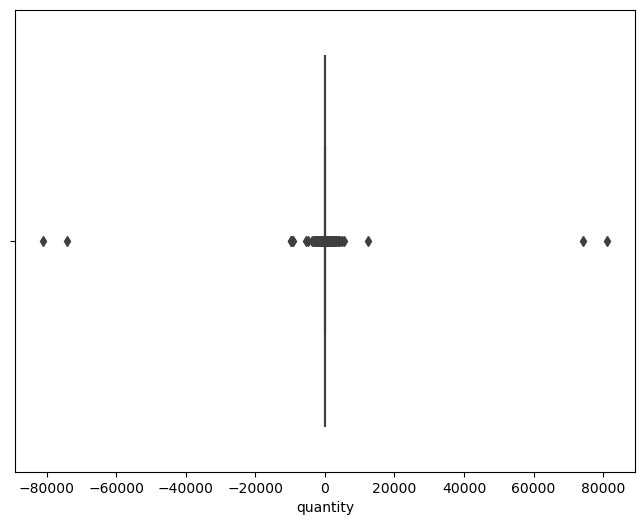

In [183]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df_ecommerce, x='quantity');

In [184]:
df_ecommerce = df_ecommerce[(df_ecommerce['quantity'] >= -15000) & (df_ecommerce['quantity'] <= 15000)]

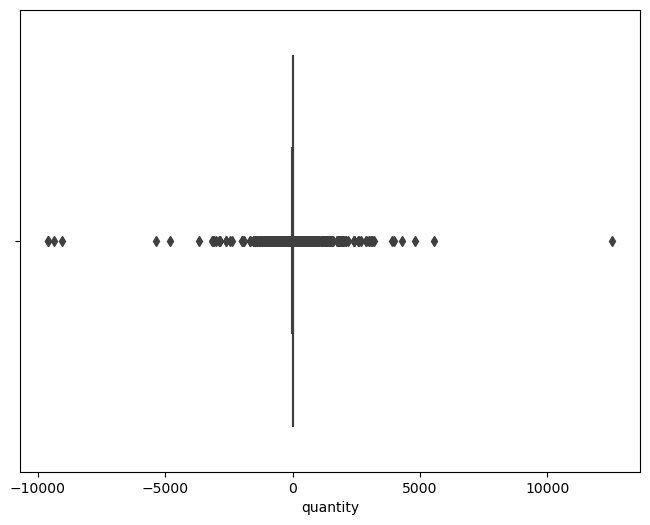

In [185]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df_ecommerce, x='quantity');

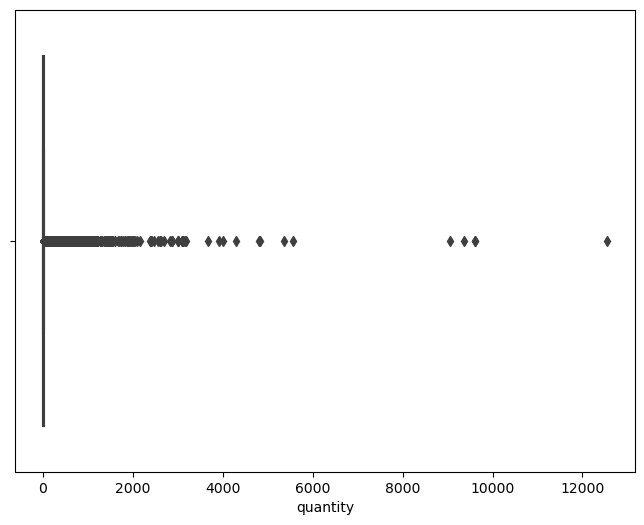

In [186]:
df_ecommerce['quantity'] = df_ecommerce['quantity'].abs()

plt.figure(figsize=(8,6))
sns.boxplot(data=df_ecommerce, x='quantity');

- Create new calculated columns that would further help the analysis process such as year, month, week, and day of transaction, and total column.

In [187]:
df_ecommerce['year'] = df_ecommerce['timestamp'].dt.year
df_ecommerce['month'] = df_ecommerce['timestamp'].dt.month
df_ecommerce['week'] = df_ecommerce['timestamp'].dt.isocalendar().week
df_ecommerce['date'] = df_ecommerce['timestamp'].dt.floor('D')

df_ecommerce['total'] = df_ecommerce['quantity'] * df_ecommerce['item_price']

- Inspect the final dataframe with `df_ecommerce.info()`, `df_ecommerce.head()` and `df_ecommerce.describe()`

In [188]:
df_ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
Index: 533735 entries, 0 to 536640
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   order_id     533735 non-null  object        
 1   item_id      533735 non-null  object        
 2   quantity     533735 non-null  int64         
 3   timestamp    533735 non-null  datetime64[ns]
 4   item_price   533735 non-null  float64       
 5   customer_id  533735 non-null  float64       
 6   item_name    533735 non-null  object        
 7   year         533735 non-null  int32         
 8   month        533735 non-null  int32         
 9   week         533735 non-null  UInt32        
 10  date         533735 non-null  datetime64[ns]
 11  total        533735 non-null  float64       
dtypes: UInt32(1), datetime64[ns](2), float64(3), int32(2), int64(1), object(3)
memory usage: 47.3+ MB


In [189]:
df_ecommerce.head()

,order_id,item_id,quantity,timestamp,item_price,customer_id,item_name,year,month,week,date,total
0,536365,85123A,6,2018-11-29 08:26:00,2.55,17850.0,WHITE HANGING HEART T-LIGHT HOLDER,2018,11,48,2018-11-29,15.30
1,536365,71053,6,2018-11-29 08:26:00,3.39,17850.0,WHITE METAL LANTERN,2018,11,48,2018-11-29,20.34
2,536365,84406B,8,2018-11-29 08:26:00,2.75,17850.0,CREAM CUPID HEARTS COAT HANGER,2018,11,48,2018-11-29,22.00
3,536365,84029G,6,2018-11-29 08:26:00,3.39,17850.0,KNITTED UNION FLAG HOT WATER BOTTLE,2018,11,48,2018-11-29,20.34
4,536365,84029E,6,2018-11-29 08:26:00,3.39,17850.0,RED WOOLLY HOTTIE WHITE HEART.,2018,11,48,2018-11-29,20.34


In [190]:
df_ecommerce.describe()

,quantity,timestamp,item_price,customer_id,year,month,week,date,total
count,533735.000000,533735,533735.000000,533735.000000,533735.000000,533735.000000,533735.0,533735,533735.000000
mean,10.857708,2019-07-02 10:53:48.924390912,3.291411,17814.447271,2018.921716,7.484952,30.825732,2019-07-01 21:19:07.695391232,19.184279
min,1.000000,2018-11-29 08:26:00,0.000000,12347.000000,2018.000000,1.000000,1.0,2018-11-29 00:00:00,0.000000
25%,1.000000,2019-03-26 11:34:00,1.250000,14375.000000,2019.000000,5.000000,18.0,2019-03-26 00:00:00,3.750000
50%,4.000000,2019-07-17 15:23:00,2.080000,16255.000000,2019.000000,8.000000,34.0,2019-07-17 00:00:00,9.900000
75%,12.000000,2019-10-16 17:10:00,4.130000,20087.000000,2019.000000,11.000000,45.0,2019-10-16 00:00:00,17.700000
max,12540.000000,2019-12-07 12:50:00,649.500000,279907.000000,2019.000000,12.000000,51.0,2019-12-07 00:00:00,38970.000000
std,54.858946,NaN,4.576831,6315.158810,0.268618,3.497802,15.155395,NaN,85.820566


In [191]:
df_ecommerce.describe(include='object')

,order_id,item_id,item_name
count,533735,533735,533735
unique,25187,3944,3810
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER
freq,1113,2301,2368


- Calculate the percentage of rows removed during the data cleaning and preparation process.

In [192]:
og_df_ecommerce = pd.read_csv('ecommerce_dataset_us.csv', sep='\t')

print('percent removed {:.3f}%'.format(len(df_ecommerce) / len(og_df_ecommerce)))

percent removed 0.985%


**Conclusions:**

Within this section, we have conducted various tasks related to data cleaning and preparation. These tasks included renaming columns, converting data types, removing duplicate entries, handling missing values, eliminating outliers, and discarding any irrelevant data for our next steps. As a result of these processes, approximately 8,174 rows or 0.985% of the original 541,909 rows have been eliminated from the datasets.

[Return to Index](#back)

<a id="num6"></a>
## Exploratory data analysis (EDA)

In this section, we will dive into the exploratory data analysis of our dataset. We will start by defining a function to evaluate the average of specified metrics on a specified period. Then, we will use this function to calculate average daily, weekly, and monthly metrics of number of customers, transactions, products sold, sales quantity, and revenue. Using these metrics, we will create a dataframe to perform an EDA on daily trends. 

Additionally, we will define a function to visualize daily trends of each metric. We will call this function on each specified metric to gain insights into the data. Afterward, we will create another dataframe to perform an EDA on monthly trends. We will use a similar approach to the daily metric and define a function to visualize monthly trends of each metric using bar chart. By the end of this section, we should have a better understanding of our data and its trends.

[Return to Index](#back)

<a id="num61"></a>
### Average Daily, Weekly, and Monthly Metrics

- Define the function `periodic_metric` to evaluate the average of specified metric on specified period.
    - This function would take four arguments:
        - `metric_name`: A string representing the name of the metric
        - `metric_unit`: A string representing the unit of measurement for the metric
        - `period`: A string representing the name of the column to group the data by
        - `agg_col`: A string representing the name of the column to perform the aggregation on
        - `method`: A string representing the aggregation function to use
        - Within the function, group the data DataFrame by period and perform the aggregation specified by method on the column specified by `agg_col`. Assign the result to the variable metric.
    - Calculate the mean of the resulting metric with `mean()` method.
    - Print out the metric_name, followed by the calculated mean and the specified metric_unit.

In [193]:
def periodic_metric(metric_name,metric_unit,period,agg_col,method):
    metric = df_ecommerce.groupby(period).agg({agg_col : method}).mean()
    print(metric_name,': {:.2f} {}'.format(metric.iloc[0], metric_unit))

- Call `periodic_metric` function to calculate average daily, weekly, and monthly metrics of number of customers, transactions, product sold, sales quantity, and revenue.

[Return to Index](#back)

<a id="num611"></a>
#### Number of Customers

In [194]:
periodic_metric('Average Daily Customer','people','date','customer_id','nunique')

periodic_metric('Average Weekly Customer','people','week','customer_id','nunique')

periodic_metric('Average Monthly Customer','people','month','customer_id','nunique')

Average Daily Customer : 73.74 people
Average Weekly Customer : 408.02 people
Average Monthly Customer : 1393.67 people


[Return to Index](#back)

<a id="num612"></a>
#### Number of Transactions

In [195]:
periodic_metric('Average Daily Transactions','items','date','order_id','nunique')

periodic_metric('Average Weekly Transactions','items','week','order_id','nunique')

periodic_metric('Average Monthly Transactions','items','month','order_id','nunique')

Average Daily Transactions : 82.58 items
Average Weekly Transactions : 493.86 items
Average Monthly Transactions : 2098.92 items


[Return to Index](#back)

<a id="num613"></a>
#### Number of Product Sold

In [196]:
periodic_metric('Average Daily Product Sold','products','date','item_id','count')

periodic_metric('Average Weekly Product Sold','products','week','item_id','count')

periodic_metric('Average Monthly Product Sold','products','month','item_id','count')

Average Daily Product Sold : 1749.95 products
Average Weekly Product Sold : 10465.39 products
Average Monthly Product Sold : 44477.92 products


[Return to Index](#back)

<a id="num614"></a>
#### Sales Quantity (Sum of Items)

In [197]:
periodic_metric('Average Daily Sales Quantity','items','date','quantity','sum')

periodic_metric('Average Weekly Sales Quantity','items','week','quantity','sum')

periodic_metric('Average Monthly Sales Quantity','items','month','quantity','sum')

Average Daily Sales Quantity : 19000.46 items
Average Weekly Sales Quantity : 113630.18 items
Average Monthly Sales Quantity : 482928.25 items


[Return to Index](#back)

<a id="num615"></a>
#### Revenue

In [198]:
periodic_metric('Average Daily Revenues','dollar','date','total','sum')

periodic_metric('Average Weekly Revenues','dollar','week','total','sum')

periodic_metric('Average Monthly Revenues','dollar','month','total','sum')

Average Daily Revenues : 33571.54 dollar
Average Weekly Revenues : 200771.00 dollar
Average Monthly Revenues : 853276.74 dollar


[Return to Index](#back)

Notes and Findings:
1. On a **daily basis**, Everything Plus makes an **average revenue of 33,571 by selling 18,102 units of 1,742 products, purchased by 67 customers.**
2. On a **weekly basis**, Everything Plus makes an **average revenue of 200,771 by selling 108,256 units of 10,418 products, purchased by 369 customers.**
3. On a **monthly basis**, Everything Plus makes an **average revenue of 853,276 by selling 468,089 units of 44,279 products, purchased by 1,128 customers.**

[Return to Index](#back)

<a id="num62"></a>
### Metric Trends

[Return to Index](#back)

<a id="num621"></a>
#### Daily Trends

- Create metric dataframe to perform an EDA on **Daily Trends**.
    - Group the `df_ecommerce` DataFrame by the date column using the `groupby()` method.
    - Call the `agg()` method to compute aggregate metrics on each group.
    - Pass a dictionary to `agg()` that maps column names to aggregation functions:
        - `total`: `sum` computes the sum of the `'total'` column.
        - `order_id`: `nunique` computes the number of unique values in the `'order_id'` column.
        - `customer_id`: `nunique` computes the number of unique values in the `'customer_id'` column.
        - Rename the resulting columns to `revenue`, `n_transaction`, and `n_customer` using the `rename()` method.
        - Compute two new columns:
            - `purchase_size`: divide the `revenue` column by the `n_transaction column.
            - `revenue_per_user`: divide the `revenue` column by the `n_customer` column.
        - Store the resulting DataFrame in the variable metric.

[Return to Index](#back)

In [199]:
metric = (df_ecommerce.groupby('date').agg({'total':'sum', 
                                            'order_id':'nunique', 
                                            'customer_id':'nunique'})).rename(columns={'total':'revenue', 
                                                                                       'order_id':'n_transaction', 
                                                                                       'customer_id':'n_customer'})

metric['purchase_size'] = metric['revenue'] / metric['n_transaction']
metric['revenue_per_user'] = metric['revenue'] / metric['n_customer']

metric.head()

,revenue,n_transaction,n_customer,purchase_size,revenue_per_user
date,,,,,
2018-11-29,57790.06,137,108,421.825255,535.093148
2018-11-30,49137.52,166,123,296.009157,399.492033
2018-12-01,46112.15,106,97,435.020283,475.382990
2018-12-03,31270.38,94,77,332.663617,406.108831
2018-12-04,52732.99,133,112,396.488647,470.830268


- Define the function `daily_metric_trends` that takes four parameters: `df_ecommerce`, `column`, `color`, and `title` to visualize daily trends.
    - Create an empty figure using `go.Figure()`.
    - Add a line chart to the figure using `fig.add_trace()`. The x-axis is set to the index of data and the y-axis is set to the values of the specified column. The color of the line is set to color.
    - Add an average line to the figure using `fig.add_shape()`. The line is a horizontal line that spans the x-axis from the minimum to the maximum index of data, and its y-value is set to the mean of the values in the specified column. The color of the line is set to black and the line is dashed.
    - Set the title of the figure using `fig.update_layout()`.
    - Show the figure using `fig.show()`.

In [200]:
def daily_metric_trends(df_ecommerce, column, color, title):
    fig = go.Figure()
    
    # add data and line chart
    fig.add_trace(go.Scatter(x=df_ecommerce.index, y=df_ecommerce[column], line=dict(color=color)))
    
    # Add average line
    fig.add_shape(type='line', x0=df_ecommerce.index.min(), y0=df_ecommerce[column].mean(), 
                  x1=df_ecommerce.index.max(), y1=df_ecommerce[column].mean(), 
                  line=dict(color='black', dash='dash'))
    
    # add title
    fig.update_layout(title=title)
    
    # show graph
    fig.show()

- Call the function of `daily_metric_trends` on each specified metric.

In [201]:
daily_metric_trends(metric, 'revenue', 'teal', 'Total Revenue ($)')

daily_metric_trends(metric, 'purchase_size', 'crimson', 'Average Purchase Size ($)')

daily_metric_trends(metric, 'revenue_per_user', 'forestgreen', 'Revenue per User ($)')

**Notes and Findings:**
1. From the **daily revenue** trends:
- The revenue generated during February to March is under the average line, indicating that the revenue during that period is lower compared to other months.
- The revenue peak occurred on September 18, generating revenue worth half a week's average revenue on that day.
- The trend line shows an increasing trend approaching September to December, as there are fewer and fewer days under the average line. This indicates an overall increase in revenue during this period.
- This increase in revenue during the latter part of the year could be attributed to the holiday season, where people tend to shop more for gifts and other holiday-related items.
2. From the **purchase size** trends:
- Although there are some fluctuations, the graph is generally stable.
- The peak in purchase size also occurred on September 18, as observed in the revenue trends.
- There is no increasing trend in November and December like in the revenue graph, which means that during these months, there were more customers, but not each individual buying more items.
3. From the **revenue per user** trends:
- The revenue per user trend shows an almost identical behavior to the purchase size, so we can't say much about this graph.
- This means that the average amount of revenue per user is correlated with the average purchase size.
- However, it's important to note that revenue per user may also be affected by other factors, such as discounts or promotions, which can influence how much a customer is willing to spend.

[Return to Index](#back)

<a id="num622"></a>
#### Monthly Metric

- Create `monthly_metric` dataframe to perform an EDA on **Monthly Trends**. Use similar approach to daily metric. 

[Return to Index](#back)

In [202]:
# Resample the data by month
temp = metric.copy()
temp = metric.drop(columns=['purchase_size','revenue_per_user'])
monthly_metric = temp.resample('M').sum()

monthly_metric['purchase_size'] = monthly_metric['revenue'] / monthly_metric['n_transaction']
monthly_metric['revenue_per_user'] = monthly_metric['revenue'] / monthly_metric['n_customer']
monthly_metric['year'] = monthly_metric.index.year

monthly_metric.head()

,revenue,n_transaction,n_customer,purchase_size,revenue_per_user,year
date,,,,,,
2018-11-30,106927.58,303,231,352.896304,462.889957,2018
2018-12-31,686935.23,1676,1451,409.865889,473.421937,2018
2019-01-31,657277.55,1585,1462,414.686151,449.574248,2019
2019-02-28,510407.14,1330,1213,383.764767,420.780824,2019
2019-03-31,683617.66,1893,1724,361.129245,396.529965,2019


- Define the `monthly_metric_trends` to visualize monthly trends of each metrics. Use similar approach to the visualization of daily trends, but use `px.bar()` instead.

In [203]:
def monthly_metric_trends(df_ecommerce, column, title, axis_name, color):
    # Create the bar chart
    fig = px.bar(df_ecommerce , x=df_ecommerce.index.month_name(), y=column, 
                 title=title, labels={'x': 'Month', column: axis_name}, 
                 hover_data=['year'], color_discrete_sequence=[color])
    
    # Set the starting point of x-axis to January
    fig.update_layout(xaxis={'categoryorder': 'array', 'categoryarray': ['January', 'February', 'March', 
                                                                         'April', 'May', 'June', 'July', 
                                                                         'August', 'September', 'October', 
                                                                         'November', 'December']})
    
    # Show the figure
    fig.show()

- Call the function of `monthly_metric_trends` on each specified metric.

In [204]:
monthly_metric_trends(monthly_metric,'revenue', 'Total Revenue by Month', 
                      'Total Revenue ($)','teal')

monthly_metric_trends(monthly_metric,'purchase_size', 'Average Purchase Size by Month', 
                      'Average Purchase Size ($)', 'crimson')

monthly_metric_trends(monthly_metric,'revenue_per_user', 'Average Revenue per User by Month', 
                      'Average Revenue per User ($)', 'forestgreen')

<a id="num7"></a>
## User Segmentation: RFM Analysis and K-Means Clustering

In this section, we will perform user segmentation analysis to better understand our customer base. We will use two popular methods: RFM analysis and K-Means clustering.

**RFM analysis** is a technique used to segment customers based on their behavior in terms of Recency, Frequency, and Monetary value. It is a powerful method to group customers who share similar characteristics and create targeted marketing strategies. RFM analysis is beneficial because it focuses on customer behavior, which is a key factor in predicting future buying patterns. This technique can provide valuable insights into customer retention, loyalty, and lifetime value.

We will also use **K-Means clustering** as our algorithm for user segmentation. K-Means is a popular unsupervised learning algorithm used to group data points into a specified number of clusters. It is a powerful tool for customer segmentation because it can quickly identify hidden patterns in large datasets. By using K-Means clustering, we can divide our customer base into distinct groups based on their RFM scores, allowing us to better understand their unique characteristics and needs. Ultimately, this analysis will help us tailor our marketing efforts to different customer groups and increase overall customer satisfaction and revenue.

[Return to Index](#back)

<a id="num71"></a>
### Customer RFM Data

- Define a function to create a customer recency, frequency, and monetary data. Take dataframe as an input.
    - Use last date in the dataset as a reference point for recency
    - Use `groupby()` and `agg()` method
    - Aggregate sum of total for monetary and count of order ID for frequency

[Return to Index](#back)

In [205]:
def create_rfm_dataset(df_ecommerce, date_column):
    last_date = df_ecommerce[date_column].max()
    last_buy_date = df_ecommerce.groupby('customer_id')[date_column].max().reset_index().rename(columns={date_column: 'last_buy_date'})
    last_buy_date['Recency'] = (last_date -  last_buy_date['last_buy_date']) // np.timedelta64(1, 'D')
    
    customer_rfm = (df_ecommerce.groupby('customer_id').agg({'total':'sum', 
                                                     'order_id': 'count'}).rename(columns={'total':'Monetary', 
                                                                                           'order_id': 'Frequency'}))
    customer_rfm = customer_rfm.join(last_buy_date.set_index('customer_id')['Recency'])
    customer_rfm = customer_rfm[['Recency', 'Frequency', 'Monetary']].copy()
    
    return customer_rfm

In [206]:
customer_rfm = create_rfm_dataset(df_ecommerce, 'date')

customer_rfm.head()

,Recency,Frequency,Monetary
customer_id,,,
12347.0,2,182,4310.00
12348.0,75,27,1437.24
12349.0,18,72,1457.55
12350.0,310,16,294.40
12352.0,36,84,1506.07


- Evaluate the aggregated data with `describe()` method.

In [207]:
customer_rfm.describe()

,Recency,Frequency,Monetary
count,7370.000000,7370.000000,7370.000000
mean,123.640977,72.419946,1389.324411
std,111.453326,190.248610,6794.293452
min,0.000000,1.000000,0.000000
25%,25.000000,2.000000,7.500000
50%,80.000000,23.500000,357.990000
75%,213.000000,78.000000,1218.867500
max,373.000000,7800.000000,279498.020000


- Define a function to calculate percent of outlier on RFM dataset. Take `dataframe` as an input.

In [208]:
def percent_outlier(df_ecommerce):
    for column in df_ecommerce.columns:
        # basic stat
        q1 = df_ecommerce[column].quantile(0.25)
        q3 = df_ecommerce[column].quantile(0.75)
        iqr = q3 - q1
        
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        
        if lower_bound < 0:
            lower_bound = df_ecommerce[column].min()

        # count the percentage of data points that are outside the normal range
        outliers = df_ecommerce[(df_ecommerce[column] < lower_bound) | (df_ecommerce[column] > upper_bound)][column]
        print('Percent outliers of', column, ': {:.2f}%'.format(len(outliers) / len(df_ecommerce) * 100))

In [209]:
percent_outlier(customer_rfm)

Percent outliers of Recency : 0.00%
Percent outliers of Frequency : 9.77%
Percent outliers of Monetary : 9.16%


- Standardized the data with `StandardScaler()`
- Visualize the standardized data with `sns.boxplot()`

<Axes: >

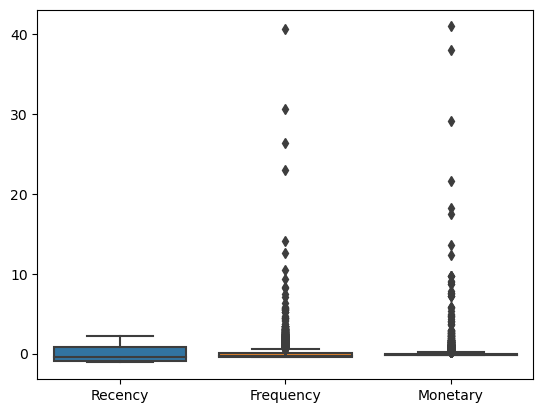

In [210]:
scaler = StandardScaler()

customer_rfm_normalized_array = scaler.fit_transform(customer_rfm)
customer_rfm_normalized = pd.DataFrame(customer_rfm_normalized_array, 
                                       columns=customer_rfm.columns, 
                                       index=customer_rfm.index)

# plt.figure(figsize=(8,6))
sns.boxplot(customer_rfm_normalized)

<a id="num72"></a>
### K-Means Clustering
K-means clustering is an unsupervised machine learning algorithm that groups unlabeled data into `k` number clusters, where `k` is a user-defined integer. K-means is an iterative algorithm that makes use of cluster centroids to divide the data in a way that groups similar data into groups.

K-means clustering starts by taking k random points, and marks these points as centroids of k clusters. It then calculates the Euclidean distance for each remaining data point from each of those centroids and assigns each data point to its closest cluster (based on the Euclidean distance from the centroid). Once a new point is added to the cluster, it recalculates the centroid by taking the mean of all the vectors inside the group, and then recursively calculates distance again. Then, the new centroid is recalculated, and this is repeated until all data points are assigned to a cluster.

In order for K-means clustering to be effective, however, it is imperative to first determine the optimal value for `k`.

- Define a function `clustering_loop` to perform K-Means Clustering. Take `dataframe`, `range_i` and `range_f` as an input.
    - Create a list of named `kmeans_cols` containing `['n_cluster','silhouette_score', 'calinski_harabaz_index', 'davies_bouldin_index']`
    - Create an empty list called `kmeans_list` to store the results of the clustering loop.
    - Using `for` loop, loops through each integer value in the range from `range_i` to `range_f` which represents `n_cluster` parameter of K-Means algorithm
    - Through each `n_cluster`, create a variable of `clustering` using `KMeans()` method
    - The function appends a list containing the current integer value, the Silhouette Score, Calinski-Harabasz index, and Davies-Bouldin index to the `kmeans_list`.
    - After the loop is complete, the function creates a pandas DataFrame called `kmeans_result` using `kmeans_list` as data and `kmeans_cols` as column names.
    - The function returns the result of calling a `clustering_evaluation` function on the `kmeans_result` DataFrame.

[Return to Index](#back)

In [211]:
def clustering_loop(df_ecommerce, range_i, range_f):
    kmeans_cols = ['n_cluster','silhouette_score', 'calinski_harabaz_index', 'davies_bouldin_index']
    kmeans_list = []
    
    for k in range(range_i,range_f):
        try:
            clustering = KMeans(n_clusters=k, random_state=42, n_init='auto').fit_predict(df_ecommerce.drop(df_ecommerce.columns[3]))
        except:
            clustering = KMeans(n_clusters=k, random_state=42, n_init='auto').fit_predict(df_ecommerce)
        kmeans_list.append([k, silhouette_score(df_ecommerce, clustering), 
                            calinski_harabasz_score(df_ecommerce, clustering), 
                            davies_bouldin_score(df_ecommerce, clustering)])
    kmeans_result = pd.DataFrame(kmeans_list, columns=kmeans_cols)
    
    return clustering_evaluation(kmeans_result)

<a id="num721"></a>
#### Evaluation Metrics For Clustering-Based Models
1. **Silhouette Score**
- The silhouette score is a metric used to calculate the goodness of fit of a clustering algorithm, but can also be used as a method for determining an optimal value of k (see here for more).
- It is calculated by taking the mean distance from intra-cluster and nearest cluster samples.
- Its value ranges from -1 to 1.
- A value of 0 indicates clusters are overlapping and either the data or the value of k is incorrect.
- 1 is the ideal value and indicates that clusters are very dense and nicely separated.
- A negative value indicates elements have likely been assigned to the wrong clusters.
- **The closer the value of the silhouette score to 1 the better-separated the clusters.**
2. **Calinski Harabaz Index**
- It is also known as the Variance Ratio Criterion.
- Calinski Harabaz Index is defined as the ratio of the sum of between-cluster dispersion and of within-cluster dispersion.
- **The higher the index the more separable the clusters.**
3. **Davies Bouldin Index**
- The Davies–Bouldin index (DBI), introduced by David L. Davies and Donald W. Bouldin in 1979, is another metric for evaluating clustering algorithms.
- The Davies Bouldin index is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances.
- The minimum value of the DB Index is 0, whereas a **smaller value (closer to 0) represents a better model that produces better clusters.**

[Return to Index](#back)

- Define a function to perform clustering evaluation. Take dataframe as an input.
    - Create a list of column names named `cols_to_normalize` that will be used to select the columns to be normalized.
    - Create a copy of the result dataframe named `result_normalized`.
    - Normalize with `MinMaxScaler()`. Use the `fit_transform` method of the scaler object to normalize the selected columns of the `result_normalized` dataframe.
    - Invert the values of the `davies_bouldin_index` column of result_normalized by subtracting the column from 1.
    - Create a list of column names named `rank_columns` that will be used to calculate the overall rank of each row in the `result_normalized` dataframe.
    - Create a new column named `overall_rank` in the `result_normalized` dataframe that contains the mean of the selected columns.
    - Rank the rows of the `result_normalized` dataframe in descending order based on the overall_rank column and assign the rank to each row.
    - Create a new column named `rank` in the `result dataframe` and assign the rank of each row from the `result_normalized` dataframe.
    - `Return` the rows of the result dataframe that have the minimum value in the rank column.

In [212]:
def clustering_evaluation(kmeans_result):
    # Select the columns to normalize
    cols_to_normalize = ['silhouette_score', 'calinski_harabaz_index', 'davies_bouldin_index']
    
    # Instantiate the scaler
    scaler = MinMaxScaler()
    
    # Fit and transform the selected columns
    result_normalized = kmeans_result.copy()
    result_normalized[cols_to_normalize] = scaler.fit_transform(result_normalized[cols_to_normalize])
    
    # scaling 'davies_bouldin_index' inversely
    result_normalized['davies_bouldin_index'] = 1 - result_normalized['davies_bouldin_index']
    
    # Create overall rank column
    rank_columns = ['silhouette_score', 'calinski_harabaz_index', 'davies_bouldin_index']
    result_normalized['overall_rank'] = result_normalized[rank_columns].mean(axis=1).rank(ascending=False)
    kmeans_result['rank'] = result_normalized['overall_rank']
    
    # print result
    return kmeans_result

- Call the `clustering_loop` function to find the best `n_cluster` value for the `K-Means` clustering

In [213]:
clustering_loop(customer_rfm_normalized, 2, 11)

,n_cluster,silhouette_score,calinski_harabaz_index,davies_bouldin_index,rank
0,2,0.943753,2964.507537,0.730553,4.0
1,3,0.539512,4664.744834,0.712943,7.0
2,4,0.539058,4523.797471,0.696567,5.0
3,5,0.569067,5106.421061,0.664354,2.0
4,6,0.469337,5017.520620,0.669621,3.0
5,7,0.483411,6256.275645,0.640617,1.0
6,8,0.391012,5875.310103,0.721913,6.0
7,9,0.395776,5774.781187,0.779827,9.0
8,10,0.395619,5310.436881,0.736784,8.0


**Notes and Findings:**
1. After comparing Sillhouette Score, Calinski Harabaz Index, and Davies Bouldin Index, of each `k` value from 2 to 10. We obtain that the best `k` value for our model to perform with our data is 7.
2. However, we will choose for `k` value to be 5 instead as we were able to obtain a higher Silhouette Score and Calinski Harabaz index, indicating that the clusters were better separated.
3. However, we had to accept a lower Davies Bouldin index in the process, which was a reasonable trade-off.

- Define `elbow_method` function to create a visualization of Sum of Squared Errors of each `k` value 
- Call `elbow_method` function to confirm whether our decision is the right thing to do

In [214]:
def elbow_method(data):
    # Run K-means clustering for different values of k
    sse = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(data)
        sse.append(kmeans.inertia_)
    
    # Plot the SSE values against the corresponding values of k
    plt.plot(range(1, 11), sse)
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Sum of Squared Errors (SSE)')
    return plt.show()

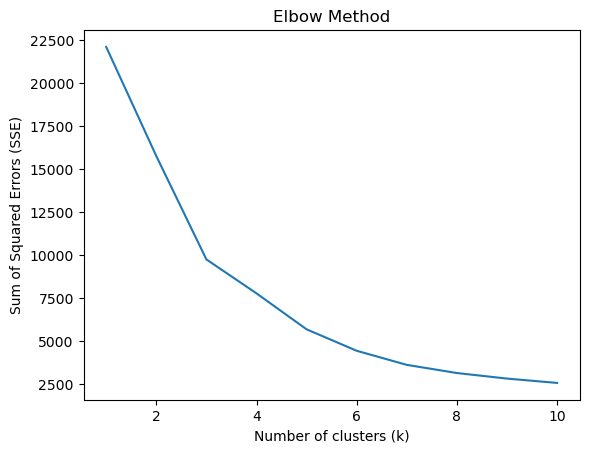

In [215]:
elbow_method(customer_rfm_normalized)

**Notes and Findings**
1. It is debatable that whether the `elbow point` fall in the `k` value of 3 or 5
2. Since `k` value of 3 ranked 7 out of 9, we decided to go through with `k` value of 5

- Define a function `kmeans_rfm ` to perform K-Means clustering on dataframe using the best hyperparameter obtained from `clustering loop` function. Print each evaluation metric and `value_counts()` of resulting clustering labels, and return the dataframe.

In [216]:
def kmeans_rfm(df_ecommerce, n_clusters):
    try:
        clustering = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto').fit_predict(df_ecommerce.drop(df_ecommerce.columns[3]))
    except:
        clustering = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto').fit_predict(df_ecommerce)
    print('Silhouette Score', silhouette_score(df_ecommerce, clustering))
    print('Calinski Harabasz Score', calinski_harabasz_score(df_ecommerce, clustering))
    print('Davies Bouldin Score', davies_bouldin_score(df_ecommerce, clustering))
    df_ecommerce['cluster'] = clustering.astype('str')
    print(df_ecommerce['cluster'].value_counts())
    
    return df_ecommerce

<a id="num73"></a>
### User Segmentation Result and Evaluation

- Call the `kmeans_rfm` function with `customer_rfm_normalized` as the data and put the `n_cluster` value obtain from previous `clustering_loop` function.

In [217]:
kmeans_rfm(customer_rfm_normalized, 5)

Silhouette Score 0.5690671097669304
Calinski Harabasz Score 5106.421061413877
Davies Bouldin Score 0.6643539954975377
cluster
2    4383
0    2655
4     325
1       4
3       3
Name: count, dtype: int64


,Recency,Frequency,Monetary,cluster
customer_id,,,,
12347.0,-1.091481,0.576023,0.429901,2
12348.0,-0.436454,-0.238756,0.007053,2
12349.0,-0.947914,-0.002208,0.010042,2
12350.0,1.672195,-0.296579,-0.161164,0
12352.0,-0.786400,0.060872,0.017184,2
...,...,...,...,...
275153.0,-0.831265,-0.375429,-0.199616,2
277779.0,-0.947914,-0.364915,-0.162107,2
278097.0,-0.956887,-0.343889,-0.026684,2


- Assign the cluster from the normalized data into the original data

In [218]:
customer_rfm['cluster'] = customer_rfm_normalized['cluster']

- Define a function `visualize_clustering_2d` to create a 2D scatter plot of clustering result
- Define a function `visualize_clustering_3d` to create a 3D scatter plot of clustering result

In [219]:
def visualize_clustering_2d(data):
    sns.scatterplot(data=data,x=data.columns[0],y=data.columns[1],hue=data.columns[3],palette='Dark2')
    plt.show()
    
    sns.scatterplot(data=data,x=data.columns[0],y=data.columns[2],hue=data.columns[3],palette='Dark2')
    plt.show()
    
    sns.scatterplot(data=data,x=data.columns[1],y=data.columns[2],hue=data.columns[3],palette='Dark2')
    plt.show()

In [220]:
def visualize_clustering_3d(df_ecommerce):
    fig = px.scatter_3d(df_ecommerce, x=df_ecommerce.columns[0], y=df_ecommerce.columns[1], 
                        z=df_ecommerce.columns[2], color=df_ecommerce.columns[3], 
                        color_discrete_sequence = px.colors.qualitative.Dark2, opacity=0.85)
    
    fig.update_layout(width=600, height=600)
    fig.show()

- Call the `visualize_clustering_2d` and `visualize_clustering_3d` function

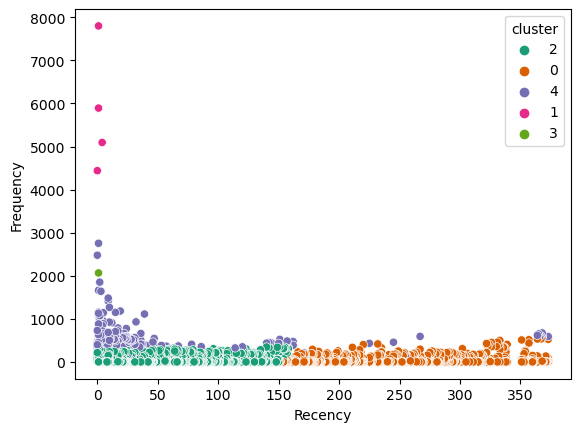

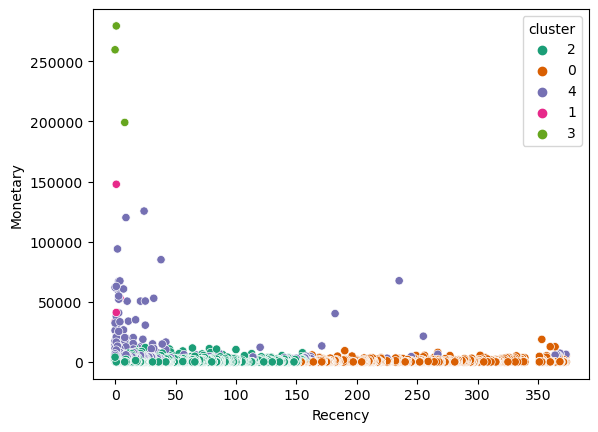

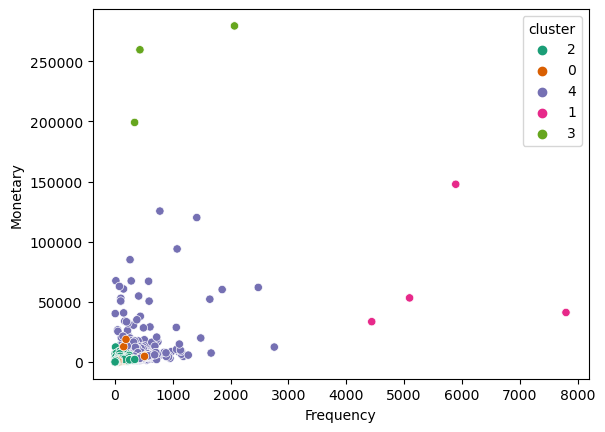

In [221]:
visualize_clustering_2d(customer_rfm)

**Notes and Findings**:
1. Simply by observing the scatterplots, it is not immediately clear how well the clusters are separated from one another.
2. Cluster 0 have the highest recency among others, which means customer of cluster 0 have not make a purchase in a long time (roughly more than 150 days from the graph)
3. Cluster 1 have the highest frequency among others
4. Cluster 3 have the highest monetary among others
5. Cluster 2 and 4 are overlap with each others with cluster 4 slighly better in frequency and monetary than cluster 2.
6. It would be beneficial to examine a 3D visualization to gain a deeper understanding of the data.

In [222]:
visualize_clustering_3d(customer_rfm)

**Notes and Findings:**
1. From the 2D and 3D scatter graph, we can deduce the type of customer from each cluster
2. **Cluster 0**, which comprises **36%** of the total customers, consists of **low-value customers**. They do not make significant contributions to revenue on an individual basis, rarely make purchases, and have not made any purchases for an extended period. As a result, pursuing this type of customer is pointless.
3. **Cluster 1** represents a very small portion of the customers, only **0.054%** of the whole. However, this cluster is made up of **loyal customers** who generate a moderate amount of revenue and make frequent purchases. Moreover, they have made a purchase recently. It is highly recommended to maintain a good relationship with this type of customer as they are valuable and we cannot afford to lose them.
4. **Cluster 2** makes up the majority with over **59%** of the total customers. This cluster is composed of **new customers** who have recently made a purchase but have not yet made enough purchases to make a significant contribution to the revenue. The marketing team should prioritize this cluster and focus on providing the appropriate promotion to convert them into loyal customers, as seen in Cluster 1. However, if the marketing team fails to reach them, there is a risk that they may become low-value customers, as seen in Cluster 0.
5. **Cluster 3** is **the big spender**. They may have only consist of **0.047%** of the whole. But they spent a lot. They buy less frequent than the loyal customer but still generates more revenue individually.It is crucial to focus on this cluster and provide them with special offers and promotions to keep them satisfied and encourage repeat purchases.
6. **Cluster 4** makes up **4.4%** of the whole. In the 3d visualization we could see how some customer overlap with other clusters which means that this is the ckuster where our clustering model fail to perform accurately. In spite of that, this cluster is mainly composed of **potential loyalist**, they are the intermediate state between new customer (cluster 2) and loyal customer (cluster 1). Converting this cluster could lead to huge increase in revenue.

[Return to Index](#back)

<a id="num8"></a>
## Answering the questions

[Return to Index](#back)

<a id="num81"></a>
### Question 1
- **Are there customer segments that only make purchases during certain seasons or times of the year?**

In [223]:
date_customer_group = ((df_ecommerce.groupby(['customer_id','date']).agg({'total':'sum'}))
                       .join(customer_rfm_normalized['cluster'])
                       .rename(columns={'total':'Purchase Size', 'cluster':'Cluster'})).reset_index()

In [224]:
fig = px.scatter(date_customer_group, x='date', y='Purchase Size', 
                 title='Purchase Size Trends of Each Cluster throughout the Year <br><sup>If you look through each cluster, there are no seasonality behaviour as each cluster make a purchase throughout every month.</sup>', 
                 labels = {'date':'Month'}, color='Cluster', color_discrete_sequence = px.colors.qualitative.Dark2)
fig.update_layout(width=800, height=400)

fig.show()

**Notes and Findings**:
1. None of the clusters exhibit a distinct seasonal behavior, such as purchasing only during a specific time of the year. 
2. However, all clusters demonstrate a trend of higher purchase sizes during November and December, which may be attributed to the holiday season.

[Return to Index](#back)

<a id="num82"></a>
### Question 2 and 3:
- **Are there customer segments that have been repeat purchasers for a long period of time?**
- **Are there customer segments that have made repeat purchases in a short time frame?**

In [225]:
customer_data = customer_rfm.drop('cluster', axis =1).copy().join(df_ecommerce.groupby('customer_id')
                                                                  .agg({'order_id':'nunique', 
                                                                        'item_id' :'nunique', 
                                                                        'quantity':'sum', 
                                                                        'month':'nunique'})
                                                                        .rename(columns={'order_id':'Number of Transactions', 
                                                                                         'item_id':'Number of Products', 
                                                                                         'quantity':'Number of Items', 
                                                                                         'month':'Number of Months with Transactions'}))

customer_data['Purchase Size'] = customer_data['Monetary'] / customer_data['Number of Transactions']
customer_data['Average Products per Transaction'] = customer_data['Number of Products'] / customer_data['Number of Transactions']
customer_data['Average Items per Product'] = customer_data['Number of Items'] / customer_data['Number of Products']
customer_data['Cluster'] = customer_rfm_normalized['cluster']

In [226]:
customer_data.sample(5)

,Recency,Frequency,Monetary,Number of Transactions,Number of Products,Number of Items,Number of Months with Transactions,Purchase Size,Average Products per Transaction,Average Items per Product,Cluster
customer_id,,,,,,,,,,,
26951.0,177,1,0.00,1,1,2,1,0.000000,1.000000,2.000000,0
16734.0,52,52,646.76,3,44,345,2,215.586667,14.666667,7.840909,2
17367.0,238,33,167.55,1,33,149,1,167.550000,33.000000,4.515152,0
26649.0,269,45,374.17,1,45,76,1,374.170000,45.000000,1.688889,0
15667.0,39,13,301.32,1,13,240,1,301.320000,13.000000,18.461538,2


In [227]:
fig = px.scatter(customer_data, x='Number of Months with Transactions', 
                 y='Frequency', 
                 title='Scatterplot of Active Months vs Purchase Frequency by Cluster', 
                 color='Cluster', color_discrete_sequence = px.colors.qualitative.Dark2)

fig.update_layout(width=800, height=400)

fig.show()

**Notes and Findings:**
1. **Cluster 2**, identified as the group of **loyal customers**, exhibits a high frequency of purchase and a high count of months with transactions, thereby addressing **question 2**.
2. No segment of customers has been identified to make repeated purchases within a short time frame. Although cluster 0 has the least active month, they do not make a significant amount of repeat purchases.

[Return to Index](#back)

<a id="num83"></a>
### Question 4
- Are there customer segments that place large orders, and what patterns can be observed in their purchasing behavior?

In [228]:
fig = px.scatter(customer_data, x='Frequency', 
                 y='Purchase Size', 
                 title='Scatterplot of Frequency vs Purchase Size by Cluster', 
                 size ='Number of Months with Transactions', color='Cluster', 
                 color_discrete_sequence = px.colors.qualitative.Dark2)

fig.update_layout(width=800, height=400)

fig.show()

**Notes and Findings:**
1. Customers who make big orders tend to have low frequency and perform transactions only in a few months throughout the year. 
2. However, some customers in Cluster 4 (Potential Loyalists) exhibit high purchase size behavior. 
3. The marketing team should focus on developing strategies to increase the frequency of their purchases or encourage them to make purchases throughout the year.

[Return to Index](#back)

<a id="num84"></a>
### Question 5
- Are there customer segments that primarily make wholesale orders?

In [229]:
fig = px.scatter(customer_data, x='Average Products per Transaction', 
                 y='Average Items per Product', 
                 title="Customer's Orders Metric <br><sup>Customer that buy wholesale are those with high average items per product and low products per transactions</sup>", 
                 color='Cluster', color_discrete_sequence = px.colors.qualitative.Dark2)

fig.update_layout(width=800, height=400)

fig.show()

**Notes and Findings:**
1. Cluster 0 (low-value customer) and cluster 2 (new customer) exhibit a wholesale purchase behavior.
2. For cluster 0, it appears that they make bulk purchases and then refrain from making any purchases for an extended period of time.

In [230]:
fig = px.scatter(customer_data, x='Recency', y='Monetary', 
                 title='Recency vs Monetary by Cluster', 
                 size='Frequency', color='Cluster', 
                 color_discrete_sequence = px.colors.qualitative.Dark2)

fig.update_layout(width=800, height=400)

fig.show()

**Notes and Findings:**
1. There are no customers who possess high values for both monetary and recency. Customers who have not made a purchase recently (cluster 0, the low-value customer) have never made significant contributions to revenue.
2. While customers who have spent a lot of money (cluster 1, the loyal customer, and cluster 3, the big spender) have made recent and frequent purchases.

[Return to Index](#back)

<a id="num9"></a>
## Formulate and test statistical hypotheses

In this section, we will formulate and test several statistical hypotheses related to our customer segmentation analysis. The hypotheses we will explore include differences in recency, purchase frequency, and monetary value between various customer clusters. Additionally, we will investigate whether purchases made during the holiday season differ in terms of purchase size and revenue generation compared to purchases made in other months. By testing these hypotheses, we can gain further insights into our customer behavior and potentially identify areas for improvement in our marketing strategies.

**There are 5 hypotheses to be tested:**
1. A cluster classified as new customer has different average of recency than a cluster classified as potential loyalist.
2. A cluster classified as loyal customer has different average of purchase frequency than a cluster classified as potential loyalist.
3. A cluster classified as loyal customer has different average of monetary than a cluster classified as big spender.
4. The revenue generated from purchases made during the holiday season (November and December) is higher than the revenue generated from purchases made during other months.
5. During the holiday season (November and December), customers tend to make purchases in larger quantities compared to other months.

[Return to Index](#back)

- Before conducting hypotesting proses, let's assign `Cluster Label` to `customer_data` to simplify the process

In [231]:
def assign_cluster_label(x):
    if x == '0':
        return 'Low Value Customer'
    
    elif x == '1':
        return 'Loyal Customer'
    
    elif x == '2':
        return 'New Customer'
    
    elif x == '3':
        return 'Big Spender'
    
    elif x == '4':
        return 'Potential Loyalist'
    
    else:
        return 'Other'

customer_data['Cluster Label'] = customer_data['Cluster'].apply(assign_cluster_label)


- Define a function to peform a variance check so we could decide whether to put `equal_var` equal `True` or `False`

In [232]:
def variance_check(df_ecommerce, cluster_1, cluster_2, metric):
    array_1 = df_ecommerce[df_ecommerce['Cluster Label'] == cluster_1][metric]
    array_2 = df_ecommerce[df_ecommerce['Cluster Label'] == cluster_2][metric]
    print(cluster_1, metric, 'variance:', np.var(array_1))
    print(cluster_2, metric, 'variance:', np.var(array_2))

- Define a `hypothesis_testing` function to check hypothesis 1 to 3.

In [233]:
def hypothesis_testing(df_ecommerce, cluster_1, cluster_2, metric, equal_var=False, alpha=0.05):
    array_1 = df_ecommerce[df_ecommerce['Cluster Label'] == cluster_1][metric]
    array_2 = df_ecommerce[df_ecommerce['Cluster Label'] == cluster_2][metric]
    results = st.ttest_ind(array_1, array_2, equal_var=equal_var)
    # print the p-value
    print('p-value:',results.pvalue) 
    # compared the p-value to significance level
    if results.pvalue < alpha:
        print('We reject the null hypothesis, the average', metric, 'value from', cluster_1, 'and', cluster_2, 'is not equal')
    else:
        print('We can not reject the null hypothesis, the average', metric, 'value from', cluster_1, 'and', cluster_2, 'is equal')

<a id="num91"></a>
### **Hypothesis 1**

- H0 (Null Hypothesis) — The average recency from new customer and potential loyalist is equal
- H1 (Alternative Hypothesis) — The average recency from new customer and potential loyalist is not equal

In [234]:
variance_check(customer_data, 'New Customer', 'Potential Loyalist', 'Recency')

New Customer Recency variance: 1728.6352486368396
Potential Loyalist Recency variance: 4642.05563076923


In [235]:
hypothesis_testing(customer_data, 'New Customer', 'Potential Loyalist', 'Recency')

p-value: 5.017053195727354e-07
We reject the null hypothesis, the average Recency value from New Customer and Potential Loyalist is not equal


**Notes and Findings:**
1. Even though a recency between new customer and potential loyalist in the 2D clustering visualization seems overlap, this hypothesis testing proved otherwise.
2. There are a significant difference between average recency value between new customer and potential loyalist.

[Return to Index](#back)

<a id="num92"></a>
### **Hypothesis 2**

- H0 (Null Hypothesis) — The average frequency from loyal customer and potential loyalist is equal
- H1 (Alternative Hypothesis) — The average frequency from loyal customer and potential loyalist is not equal

In [236]:
variance_check(customer_data, 'Loyal Customer', 'Potential Loyalist', 'Frequency')

Loyal Customer Frequency variance: 1588769.5
Potential Loyalist Frequency variance: 90539.05037633138


In [237]:
hypothesis_testing(customer_data, 'Loyal Customer', 'Potential Loyalist', 'Frequency')

p-value: 0.005292405872189566
We reject the null hypothesis, the average Frequency value from Loyal Customer and Potential Loyalist is not equal


**Notes and Findings**
1. From the clustering visualization, we could differentiate clearly between an already loyal customer and potential loyalist from their purchase frequency. This hypothesis testing support our arguments.
2. There are significant difference between average frequency value between loyal customer and potential loyalist.

[Return to Index](#back)

<a id="num93"></a>
### **Hypothesis 3**

- H0 (Null Hypothesis) — The average monetary from loyal customer and big spender is equal
- H1 (Alternative Hypothesis) — The average monetary from loyal customer and big spender is not equal

In [238]:
variance_check(customer_data, 'Loyal Customer', 'Big Spender', 'Monetary')

Loyal Customer Monetary variance: 2123097398.1973193
Big Spender Monetary variance: 1166089804.7957563


In [239]:
hypothesis_testing(customer_data, 'Loyal Customer', 'Big Spender', 'Monetary')

p-value: 0.004483428969366753
We reject the null hypothesis, the average Monetary value from Loyal Customer and Big Spender is not equal


**Notes and Findings**
1. From the clustering visualization, we could differentiate clearly between a loyal customer and big spender from their monetary contribution. This hypothesis testing support our arguments.
2. There are significant difference between average monetary value between loyal customer and big spender.

[Return to Index](#back)

<a id="num94"></a>
### **Hypothesis 4**

- H0 (Null Hypothesis) — The average revenue between purchase made on holiday season (November and December) and other months is equal
- H1 (Alternative Hypothesis) — The average revenue between purchase made on holiday season (November and December) and other months is not equal

- Create a new dataframe from `data`. The `nov_dec_purchase` dataframe contains transactions that occurred in November and December, while the `other_months_purchase` dataframe contains transactions that occurred in other months.

In [240]:
order_data = df_ecommerce.groupby(['order_id','month']).agg({'total':'sum', 'quantity':'sum'}).rename(columns={'total':'revenue'}).reset_index()

nov_dec_purchase = order_data[(order_data['month'] == 11) | (order_data['month'] == 12)] 

other_months_purchase = order_data[(order_data['month'] != 11) & (order_data['month'] != 12)] 

- Define a `purchases_hypothesis_testing` function to check hypothesis 4 and 5.

In [241]:
def purchases_hypothesis_testing(data_1, data_2, metric, equal_var=False, alpha=0.05):
    array_1 = data_1[metric]
    array_2 = data_2[metric]
    print('Purchases from November and December', metric, 'variance:', np.var(array_1))
    print('Purchases from Other Months', metric, 'variance:', np.var(array_2))

    results = st.ttest_ind(array_1, array_2, equal_var=equal_var)
    # print the p-value
    print('p-value:',results.pvalue) 
    # compared the p-value to significance level
    if results.pvalue < alpha:
        print('We reject the null hypothesis, the average', metric, 'value between purchases made on holiday season and other month is not equal')
    else:
        print('We can not reject the null hypothesis, the average', metric, 'value between purchases made on holiday season and other month is equal')

In [242]:
purchases_hypothesis_testing(nov_dec_purchase, other_months_purchase, 'revenue')

Purchases from November and December revenue variance: 1716696.514986308
Purchases from Other Months revenue variance: 976439.784910587
p-value: 0.08459310706205427
We can not reject the null hypothesis, the average revenue value between purchases made on holiday season and other month is equal


**Notes and Findings:**
1. The hypothesis testing proved that the revenue generated by purchases made on holiday season and other months is not significantly different.

[Return to Index](#back)

<a id="num95"></a>
### **Hypothesis 5**

- H0 (Null Hypothesis) — The average quantity between purchase made on holiday season (November and December) and other months is equal
- H1 (Alternative Hypothesis) — The average quantity between purchase made on holiday season (November and December) and other months is not equal

In [243]:
purchases_hypothesis_testing(nov_dec_purchase, other_months_purchase, 'quantity')

Purchases from November and December quantity variance: 262930.29728157615
Purchases from Other Months quantity variance: 299922.4744427909
p-value: 0.1758417411365071
We can not reject the null hypothesis, the average quantity value between purchases made on holiday season and other month is equal


**Notes and Findings:**
1. The hypothesis testing proved that the average quantity of purchases made on holiday season and other months is not significantly different.

[Return to Index](#back)

<a id="num10"></a>
## **Final Conclusions**

In this project, the main objective was to analyze the transaction history of Everything Plus. The project involved several steps and techniques, which are summarized as follows:
1. **Data preparation:** 
    - We started by cleaning and preparing the data. This included various tasks such as renaming columns, converting data types, removing duplicate entries, handling missing values, eliminating outliers, and discarding irrelevant data. 
    - As a result, around 8,174 rows, which represented 0.985% of the original 541,909 rows, were eliminated from the datasets.
-----
2. **Exploratory Data Analysis:** 
    - We carried out exploratory data analysis and visualized several metrics. Our analysis showed that Everything Plus generates an average revenue of $33,571 daily by selling 18,102 units of 1,742 products, which are purchased by 67 customers. 
    - We also noticed an increase in revenue trends during the holiday season. We will test this hypothesis in a later section through statistical testing.
-----
3. **User Segmentation:** 
    - We performed user segmentation using RFM analysis and K-Means clustering. 
    - To evaluate the clustering results, we compared several metrics such as Silhouette Score, Calinski Harabaz Index, and Davies Bouldin Index
    - The user clustering analysis revealed five clusters of customers. 
        - Cluster 0 represents low-value customers who do not contribute much to revenue and are not worth pursuing. 
        - Cluster 1 consists of loyal customers who make frequent purchases and generate moderate revenue. 
        - Cluster 2 is composed of new customers who have made recent purchases but have not yet contributed significantly to revenue, and they should be targeted for promotions to convert them into potential loyalist. 
        - Cluster 3 is the big spender cluster, and it is essential to provide them with special offers and promotions to encourage repeat purchases. 
        - Cluster 4 is a potential loyalist cluster that could lead to a significant increase in revenue if converted into loyal customers.
    - We will conduct statistical testing to determine if there is a significant difference between the clusters.
-----
4. **Answering Question:**
    - Q1: Are there customer segments that only make purchases during certain seasons or times of the year?
        - A1: No segment exhibits a distinct seasonal behavior, but higher purchase sizes in Nov and Dec may be due to the holiday season.
    - Q2: Are there customer segments that have been repeat purchasers for a long period of time?
        - A2: Cluster 2 (loyal customers) shows a high frequency of purchase and a high count of months with transactions.
    - Q3: Are there customer segments that have made repeat purchases in a short time frame?
        - A3: No segment has been identified to make repeated purchases within a short time frame.
    - Q4: Are there customer segments that place large orders, and what patterns can be observed in their purchasing behavior?
        - A4: Customers who make big orders tend to have low frequency, but some in Cluster 4 exhibit high purchase size behavior. The marketing team should focus on increasing their purchase frequency.
    - Q5: Are there customer segments that primarily make wholesale orders?
        - A5: Cluster 0 (low-value customer) and cluster 2 (new customer) exhibit a wholesale purchase behavior.
    - Q6: Are there customer segments that were previously high spenders or frequent purchasers but have since stopped making purchases and have been inactive for a long period of time?
        - A6: No customers have high values for both monetary and recency. Customers who have not made a purchase recently (cluster 0) have never made significant contributions to revenue, while those who spent a lot of money (clusters 1 and 3) have made recent and frequent purchases.
-----
5. **Hypothesis Testing Results:**
    - The hypothesis testing disproves the overlap between the recency of new customers and potential loyalists in the 2D clustering visualization, indicating a significant difference between their average recency values.
    - The hypothesis testing supports the clustering visualization's argument that loyal customers and potential loyalists can be differentiated by purchase frequency, with a significant difference between their average frequency values.
    - The hypothesis testing supports the clustering visualization's argument that loyal customers and big spenders can be differentiated by monetary contribution, with a significant difference between their average monetary values.
    - The hypothesis testing proved that there is no significant difference in revenue generated by purchases made during the holiday season compared to other months.
    - The hypothesis testing proved that there is no significant difference in the average quantity of purchases made during the holiday season compared to other months.

[Return to Index](#back)

<a id="num_11"></a>
## Links

- https://mailchimp.com/resources/rfm-analysis/
    - RFM, sometimes referred to as RFM analysis, is a kind of behavioral targeting and customer segmentation that helps companies rank and group their clientele according to the amount, frequency, and recentness of a transaction. To make the best use of their cash, small business owners and marketers can identify their target demographic with the use of RFM marketing. 
-----
- https://www.kaggle.com/code/yugagrawal95/rfm-analysis
    - example of using RFM analysis. One technique for determining customer value is RFM. It is frequently employed in direct marketing and database marketing, and the retail and professional services sectors have given it special consideration.
-----
- https://downloads.hindawi.com/journals/mpe/2020/8884227.pdf
    - Online purchasing has emerged as the most common transaction pattern in China's e-business landscape. According to statistics, RMB 10,632.4 billion was sold nationally online in 2019. The buying habits of customers fluctuate in such an online setting. Selling organizations therefore desperately require a great customer-oriented marketing strategy for data mining-based online behavior prediction. Data mining is the best technique for analyzing customer purchasing behavior because it can extract highly relevant hidden knowledge from massive volumes of online transaction data. Specifically, data mining is thought to have a wide range of industry prospects in the current big data era.
-----
- https://domino.ai/blog/getting-started-with-k-means-clustering-in-python
    - explains what k-means clustering is and what can be done with it
-----
- https://www.tujom.org/index.php/1/article/view/84/69
    - This paper presents a case study on the analytical approach of behavioral consumer segmentation utilizing the RFM (Recency, Frequency, and Monetary Value) model, which involves segmenting and profiling clients based on their lifetime value. For the case study, actual customer information collected from an Istanbul, Turkey gas station is utilized.  Ten customer description variables and information on 1015 customers' arrival frequency, last arrival date, and total spend amount during the first half of 2016 are included in the data.  Initially, descriptive statistics were used to examine the demographic traits of gas station patrons.  Then, using the SPSS application, the consumers' RFM scores were determined. Based on these ratings, cluster analysis was used to divide the customers into 5 categories. Lastly, the customer profile of the segments has been developed by the application of discriminant and correspond analysis.  While gas station managers believe that car drivers are their most valuable clients, the analysis's findings indicate that truck drivers are actually the company's most valuable clients.  Recommendations based on customer profiles of the two most valued segments—VIP and GOLD—are provided at the end of the article.

[Return to Index](#back)